In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler


## Combination of over- and under-sampling With Evaluation

In [2]:
df= pd.read_csv('heart2022python.csv')
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,2,4,0,1,9,0,0,0,0,...,10,1.60,71.67,27.99,0,0,1,1,0,0
1,1,2,0,0,1,6,0,0,0,0,...,11,1.78,95.25,30.13,0,0,1,1,0,0
2,1,2,0,0,0,8,0,0,0,0,...,12,1.85,108.86,31.66,1,0,0,1,0,1
3,0,4,5,0,1,9,0,0,0,0,...,13,1.70,90.72,31.32,0,0,1,1,0,1
4,0,3,3,15,1,5,0,0,0,0,...,13,1.55,79.38,33.07,0,0,1,1,0,0


In [3]:
df.drop(['SleepHours',"DeafOrHardOfHearing",'BlindOrVisionDifficulty',"DifficultyConcentrating","DifficultyWalking",'DifficultyDressingBathing',"DifficultyErrands","ECigaretteUsage","ChestScan",'HeightInMeters',"WeightInKilograms","HIVTesting",'FluVaxLast12',"PneumoVaxEver","HighRiskLastYear","CovidPos"],axis=1,inplace=True)



df.shape
df['HadHeartAttack'].value_counts()


HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
df['HadHeartAttack'].value_counts()

HadHeartAttack
0    218267
1     13407
Name: count, dtype: int64

## splite data

In [6]:
x = df.drop(["HadHeartAttack"] , axis = 1).values
y = df["HadHeartAttack"].values

In [7]:
smote_enn = SMOTEENN(random_state=42)
x_ST, y_ST = smote_enn.fit_resample(x, y)
x_train7, x_test7, y_train7, y_test7 = train_test_split(x_ST, y_ST, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train7 = scaler.fit_transform(x_train7)
x_test7 = scaler.transform(x_test7)

## Random Forest

In [9]:


# rf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train7, y_train7)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

params = {
    'n_estimators': 200,  # Liczba drzew
    'max_depth': 30,        # Maksymalna głębokość drzewa
    'min_samples_split': 4,   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': 1,    # Minimalna liczba próbek wymagana w liściu
    'max_features':'sqrt' # Liczba cech do rozważenia przy każdym podziale
}

rf_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
rf_clf.fit(x_train7, y_train7)

# Predykcje i ocena modelu
ypred_train = rf_clf.predict(x_train7)
ypred_test = rf_clf.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train))
print("Test Results\n")
print(classification_report(y_test7, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test7, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# # Ocena modelu za pomocą walidacji krzyżowej
# cross_val_scores = cross_val_score(rf_clf, x_train7, y_train7, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    129863
           1       1.00      0.99      1.00    157923

    accuracy                           0.99    287786
   macro avg       0.99      1.00      0.99    287786
weighted avg       0.99      0.99      0.99    287786

Test Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43405
           1       0.99      0.97      0.98     52524

    accuracy                           0.98     95929
   macro avg       0.98      0.98      0.98     95929
weighted avg       0.98      0.98      0.98     95929

Confusion Matrix:
 [[42827   578]
 [ 1446 51078]]


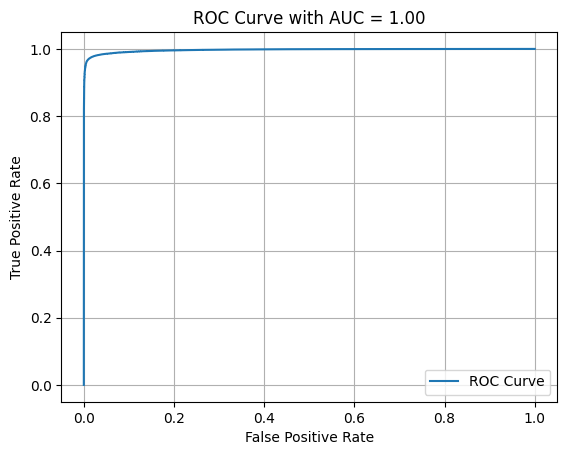

In [10]:


y_proba_test = rf_clf.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:

# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train7, y_train7)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train7, y_train7)

params = {
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'criterion': 'entropy'
}

best_tree = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion'])
best_tree.fit(x_train7, y_train7)


ypred_train2 = best_tree.predict(x_train7)
ypred_test2 = best_tree.predict(x_test7)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train7, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test7, ypred_test2))

# # Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
# cross_val_scores = cross_val_score(best_tree, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    129863
           1       0.99      0.98      0.99    157923

    accuracy                           0.99    287786
   macro avg       0.99      0.99      0.99    287786
weighted avg       0.99      0.99      0.99    287786

Testing Results

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     43405
           1       0.98      0.96      0.97     52524

    accuracy                           0.97     95929
   macro avg       0.97      0.97      0.97     95929
weighted avg       0.97      0.97      0.97     95929



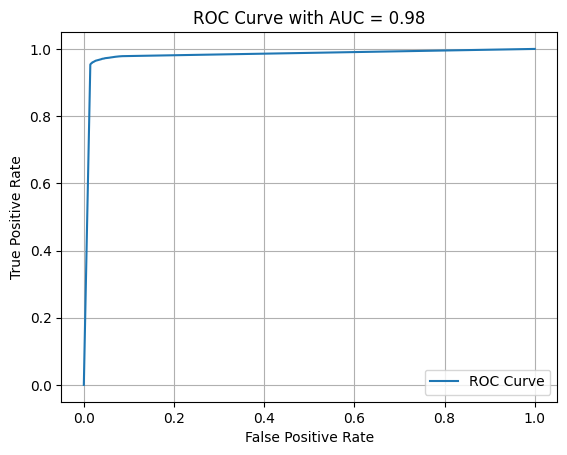

In [12]:

y_proba_test = best_tree.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train7, y_train7)
ypred_train3 = Gnb.predict(x_train7)
y_pred_test3 = Gnb.predict(x_test7)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test7, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.8195436208028855


In [14]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.77      0.87      0.81    129863
           1       0.88      0.78      0.83    157923

    accuracy                           0.82    287786
   macro avg       0.82      0.82      0.82    287786
weighted avg       0.83      0.82      0.82    287786



In [15]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.77      0.86      0.81     43405
           1       0.88      0.78      0.83     52524

    accuracy                           0.82     95929
   macro avg       0.82      0.82      0.82     95929
weighted avg       0.83      0.82      0.82     95929



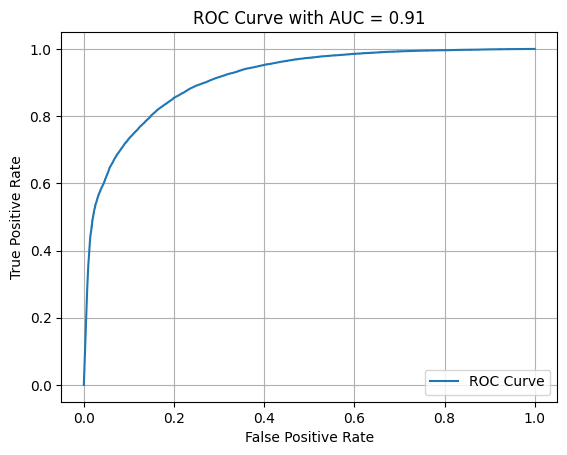

In [16]:
# cross_val_scores = cross_val_score(Gnb, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = Gnb.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9808781525161058
Accuracy on Test set:  0.9752629548937235

Training Results

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    129863
           1       0.99      0.97      0.98    157923

    accuracy                           0.98    287786
   macro avg       0.98      0.98      0.98    287786
weighted avg       0.98      0.98      0.98    287786

Testing Results

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43405
           1       0.99      0.97      0.98     52524

    accuracy                           0.98     95929
   macro avg       0.97      0.98      0.98     95929
weighted avg       0.98      0.98      0.98     95929



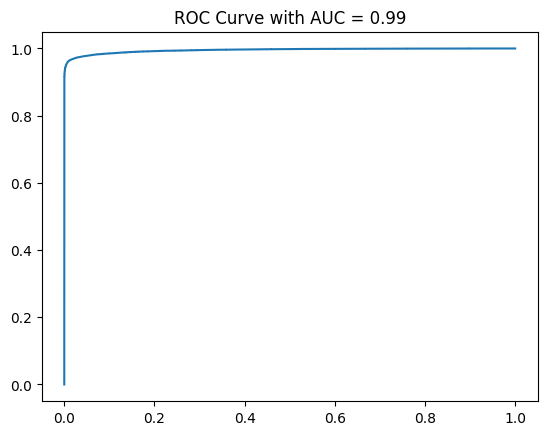

In [17]:

# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 0.7
}

best_xg = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
best_xg.fit(x_train7, y_train7)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train7)
y_pred_test4 = best_xg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.8551701611614185
Accuracy on Test set:  0.857186043844927

Training Results

              precision    recall  f1-score   support

           0       0.82      0.87      0.84    129863
           1       0.89      0.84      0.86    157923

    accuracy                           0.86    287786
   macro avg       0.85      0.86      0.85    287786
weighted avg       0.86      0.86      0.86    287786

Testing Results

              precision    recall  f1-score   support

           0       0.82      0.87      0.85     43405
           1       0.89      0.84      0.87     52524

    accuracy                           0.86     95929
   macro avg       0.86      0.86      0.86     95929
weighted avg       0.86      0.86      0.86     95929



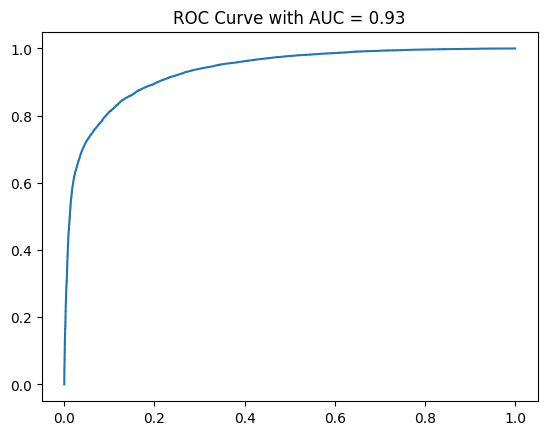

In [18]:

# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 0.01,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train7, y_train7)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train7)
y_pred_test4 = best_lg.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test4)))
plt.show()

## GradientBoostingClassifier


Accuracy on Training set:  0.9883872043810331
Accuracy on Test set:  0.9752629548937235

Training Results

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    129863
           1       1.00      0.98      0.99    157923

    accuracy                           0.99    287786
   macro avg       0.99      0.99      0.99    287786
weighted avg       0.99      0.99      0.99    287786

Testing Results

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43405
           1       0.99      0.97      0.98     52524

    accuracy                           0.98     95929
   macro avg       0.97      0.98      0.98     95929
weighted avg       0.98      0.98      0.98     95929



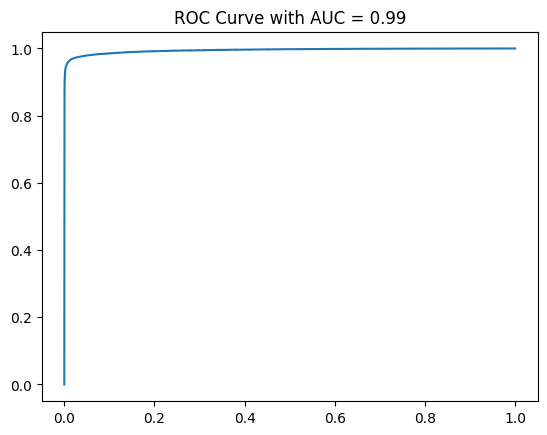

In [19]:


# # Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train7, y_train7)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_


params = {
    'n_estimators': 300,
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_split': 4,
    'min_samples_leaf': 2
}

best_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'])
best_gb.fit(x_train7, y_train7)
# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train7)
y_pred_test6 = best_gb.predict(x_test7)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train7, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test7, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train7, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test7, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train7, y_train7)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train7, 
            y_train7)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.9742372940399108

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train6 = grid_cv.predict(x_train7)
y_pred_test6 = grid_cv.predict(x_test7)
print("XGBClassifier Accuracy: ",accuracy_score(y_test7, y_pred_test6))

XGBClassifier Accuracy:  0.9762532706480834


In [26]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train6))

Training Results

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129863
           1       1.00      1.00      1.00    157923

    accuracy                           1.00    287786
   macro avg       1.00      1.00      1.00    287786
weighted avg       1.00      1.00      1.00    287786



In [27]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test6))

Testing Results

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     43405
           1       0.97      0.99      0.98     52524

    accuracy                           0.98     95929
   macro avg       0.98      0.97      0.98     95929
weighted avg       0.98      0.98      0.98     95929



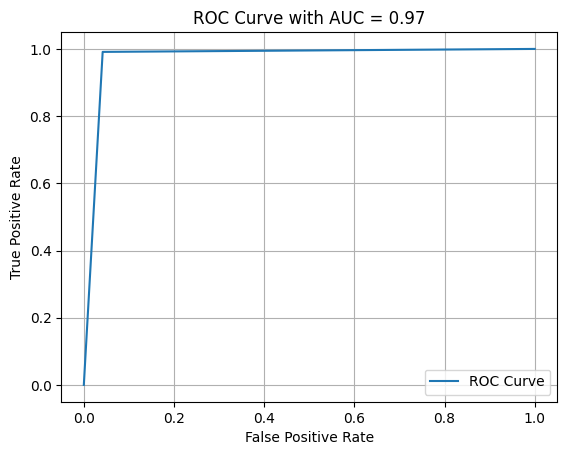

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())


y_proba_test = grid_cv.predict_proba(x_test7)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=14, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train7, y_train7, batch_size = 32, epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


8994/8994 [==============================] - 22s 2ms/step - loss: 0.3143 - accuracy: 0.8611 - val_loss: 0.2852 - val_accuracy: 0.8788
Epoch 2/100
8994/8994 [==============================] - 18s 2ms/step - loss: 0.2624 - accuracy: 0.8885 - val_loss: 0.2431 - val_accuracy: 0.8974
Epoch 3/100
8994/8994 [==============================] - 18s 2ms/step - loss: 0.2302 - accuracy: 0.9051 - val_loss: 0.2198 - val_accuracy: 0.9112
Epoch 4/100
8994/8994 [==============================] - 18s 2ms/step - loss: 0.2154 - accuracy: 0.9118 - val_loss: 0.2128 - val_accuracy: 0.9134
Epoch 5/100
8994/8994 [==============================] - 19s 2ms/step - loss: 0.2079 - accuracy: 0.9155 - val_loss: 0.2025 - val_accuracy: 0.9177
Epoch 6/100
8994/8994 [==============================] - 20s 2ms/step - loss: 0.2029 - accuracy: 0.9177 - val_loss: 0.1992 - val_accuracy: 0.9200
Epoch 7/100
8994/8994 [==============================] - 20s 2ms/step - loss: 0.1993 - accuracy: 0.9192 - val_loss: 0.1943

In [36]:
ypred_train7 = ann.predict(x_train7)
y_pred_test7 = ann.predict(x_test7)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)
print(np.concatenate((y_pred_test7.reshape(len(y_pred_test7),1), y_test7.reshape(len(y_test7),1)),1))

2998/2998 [==============================] - 3s 1ms/step
[[1 1]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [37]:
accuracy_score(y_test7, y_pred_test7)

0.9370471911517894

In [38]:
print("Training Results\n")
print(classification_report(y_train7, ypred_train7))

Training Results

              precision    recall  f1-score   support

           0       0.90      0.96      0.93    129863
           1       0.97      0.92      0.94    157923

    accuracy                           0.94    287786
   macro avg       0.94      0.94      0.94    287786
weighted avg       0.94      0.94      0.94    287786



In [39]:
print('Testing Results\n')
print(classification_report(y_test7, y_pred_test7))

Testing Results

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     43405
           1       0.97      0.91      0.94     52524

    accuracy                           0.94     95929
   macro avg       0.94      0.94      0.94     95929
weighted avg       0.94      0.94      0.94     95929



2998/2998 [==============================] - 3s 1ms/step


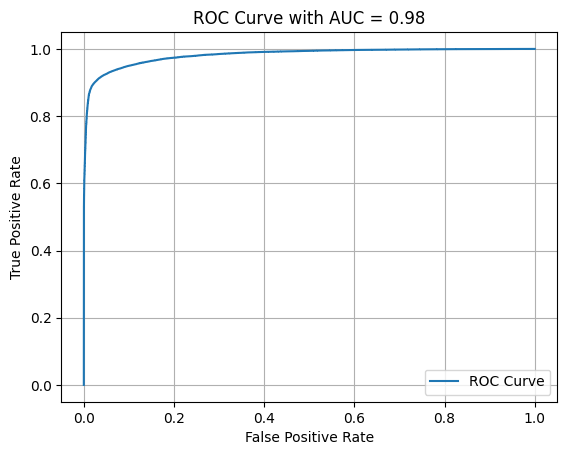

In [40]:
# cross_val_scores = cross_val_score(ann, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = ann.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)



model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(14,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
8994/8994 [==============================] - 14s 1ms/step - loss: 0.3170 - accuracy: 0.8621
Epoch 2/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2547 - accuracy: 0.8904
Epoch 3/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2357 - accuracy: 0.8999
Epoch 4/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2262 - accuracy: 0.9049
Epoch 5/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2187 - accuracy: 0.9080
Epoch 6/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2138 - accuracy: 0.9102
Epoch 7/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2096 - accuracy: 0.9125
Epoch 8/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2070 - accuracy: 0.9133
Epoch 9/100
8994/8994 [==============================] - 14s 2ms/step - loss: 0.2051 - accuracy: 0.9140
Epoch 10/100
8994/8994 [==============================] - 13s 1m

In [42]:
model_2.evaluate(x_test7,y_test7)

2998/2998 [==============================] - 4s 1ms/step - loss: 0.1619 - accuracy: 0.9356


[0.1618887186050415, 0.9355669021606445]

In [43]:
ypred_train10 = model_2.predict(x_train7)
y_pred_test10 = model_2.predict(x_test7)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)

print(classification_report(y_train7,ypred_train10))
print(classification_report(y_test7,y_pred_test10))

2998/2998 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.93    129863
           1       0.95      0.93      0.94    157923

    accuracy                           0.94    287786
   macro avg       0.93      0.94      0.94    287786
weighted avg       0.94      0.94      0.94    287786

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     43405
           1       0.95      0.93      0.94     52524

    accuracy                           0.94     95929
   macro avg       0.93      0.94      0.94     95929
weighted avg       0.94      0.94      0.94     95929



2998/2998 [==============================] - 3s 971us/step


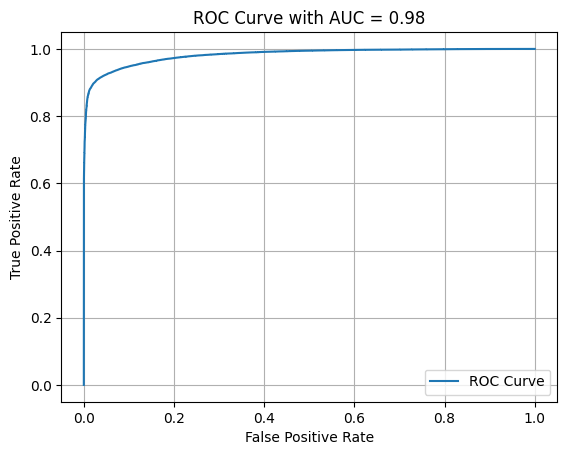

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [45]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(36,activation = 'relu'),
  tf.keras.layers.Dense(18,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train7,y_train7,epochs = 100)

Epoch 1/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2828 - accuracy: 0.8797
Epoch 2/100
8994/8994 [==============================] - 12s 1ms/step - loss: 0.2128 - accuracy: 0.9155
Epoch 3/100
8994/8994 [==============================] - 12s 1ms/step - loss: 0.1902 - accuracy: 0.9265
Epoch 4/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.1782 - accuracy: 0.9324
Epoch 5/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.1702 - accuracy: 0.9360
Epoch 6/100
8994/8994 [==============================] - 12s 1ms/step - loss: 0.1639 - accuracy: 0.9381
Epoch 7/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.1591 - accuracy: 0.9399
Epoch 8/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.1558 - accuracy: 0.9413
Epoch 9/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.1541 - accuracy: 0.9420
Epoch 10/100
8994/8994 [==============================] - 12s 1m

In [46]:
model_22.evaluate(x_test7,y_test7)

2998/2998 [==============================] - 4s 1ms/step - loss: 0.1385 - accuracy: 0.9503


[0.1385383903980255, 0.9502861499786377]

In [47]:
ypred_train22 = model_22.predict(x_train7)
y_pred_test22 = model_22.predict(x_test7)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train7,ypred_train22))
print(classification_report(y_test7,y_pred_test22))

2998/2998 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95    129863
           1       0.96      0.95      0.96    157923

    accuracy                           0.95    287786
   macro avg       0.95      0.95      0.95    287786
weighted avg       0.95      0.95      0.95    287786

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     43405
           1       0.96      0.95      0.95     52524

    accuracy                           0.95     95929
   macro avg       0.95      0.95      0.95     95929
weighted avg       0.95      0.95      0.95     95929



2998/2998 [==============================] - 4s 1ms/step


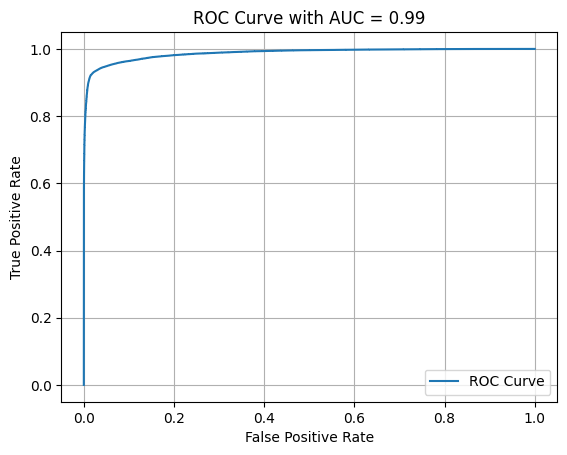

In [48]:
# cross_val_scores = cross_val_score(model_22, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model_22.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [49]:
model1 = Sequential()
model1.add(Dense(units=30,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [50]:
model1.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3702 - val_loss: 0.3024
Epoch 2/100
8994/8994 [==============================] - 20s 2ms/step - loss: 0.3343 - val_loss: 0.2840
Epoch 3/100
8994/8994 [==============================] - 20s 2ms/step - loss: 0.3240 - val_loss: 0.2746
Epoch 4/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3189 - val_loss: 0.2680
Epoch 5/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3144 - val_loss: 0.2621
Epoch 6/100
8994/8994 [==============================] - 20s 2ms/step - loss: 0.3120 - val_loss: 0.2624
Epoch 7/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3106 - val_loss: 0.2601
Epoch 8/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3079 - val_loss: 0.2577
Epoch 9/100
8994/8994 [==============================] - 21s 2ms/step - loss: 0.3069 - val_loss: 0.2564
Epoch 10/100
8994/8994 [==============================] - 21s 2m

In [51]:


predictions = model1.predict(x_test7)

ypred_train11 = model1.predict(x_train7)
y_pred_test11 = model1.predict(x_test7)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)


print("Training Results\n")
print(classification_report(y_train7,ypred_train11))
print("Testing Results\n")
print(classification_report(y_test7,y_pred_test11))

2998/2998 [==============================] - 3s 910us/step
Training Results

              precision    recall  f1-score   support

           0       0.85      0.94      0.89    129863
           1       0.94      0.86      0.90    157923

    accuracy                           0.90    287786
   macro avg       0.90      0.90      0.90    287786
weighted avg       0.90      0.90      0.90    287786

Testing Results

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     43405
           1       0.94      0.86      0.90     52524

    accuracy                           0.90     95929
   macro avg       0.90      0.90      0.90     95929
weighted avg       0.90      0.90      0.90     95929



2998/2998 [==============================] - 3s 998us/step


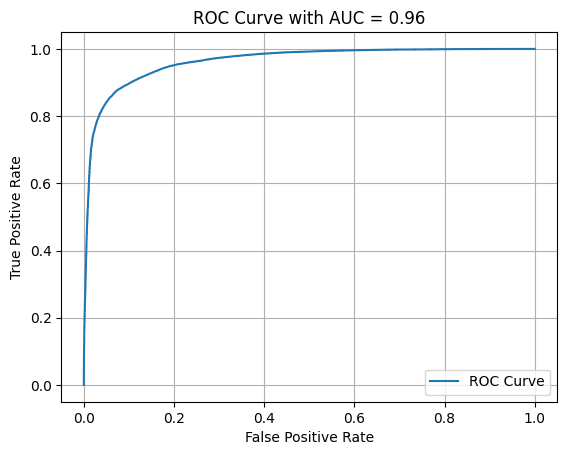

In [52]:
# cross_val_scores = cross_val_score(model1, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model1.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model2 = Sequential()



model2.add(Dense(14,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model2.fit(x=x_train7, 
          y=y_train7, 
          epochs=100,
          validation_data=(x_test7, y_test7), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
8994/8994 [==============================] - 14s 2ms/step - loss: 0.3461 - val_loss: 0.2914
Epoch 2/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.3076 - val_loss: 0.2727
Epoch 3/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2962 - val_loss: 0.2662
Epoch 4/100
8994/8994 [==============================] - 14s 2ms/step - loss: 0.2896 - val_loss: 0.2586
Epoch 5/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2860 - val_loss: 0.2542
Epoch 6/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2853 - val_loss: 0.2539
Epoch 7/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2835 - val_loss: 0.2512
Epoch 8/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2830 - val_loss: 0.2494
Epoch 9/100
8994/8994 [==============================] - 13s 1ms/step - loss: 0.2821 - val_loss: 0.2488
Epoch 10/100
8994/8994 [==============================] - 13s 1m

In [55]:
ypred_train12 = model2.predict(x_train7)
y_pred_test12 = model2.predict(x_test7)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train7,ypred_train12))
print(classification_report(y_test7,y_pred_test12))

2998/2998 [==============================] - 3s 884us/step
              precision    recall  f1-score   support

           0       0.87      0.92      0.89    129863
           1       0.93      0.89      0.91    157923

    accuracy                           0.90    287786
   macro avg       0.90      0.90      0.90    287786
weighted avg       0.90      0.90      0.90    287786

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     43405
           1       0.93      0.89      0.91     52524

    accuracy                           0.90     95929
   macro avg       0.90      0.90      0.90     95929
weighted avg       0.90      0.90      0.90     95929



2998/2998 [==============================] - 3s 947us/step


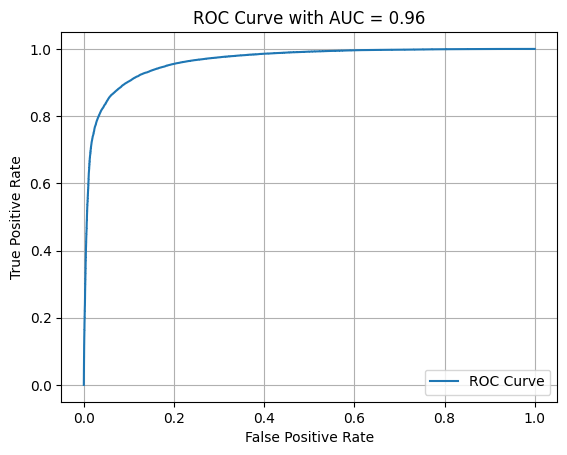

In [56]:
# cross_val_scores = cross_val_score(model2, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())
y_proba_test = model2.predict(x_test7).flatten()

fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
# model3 = SVC(probability=True)

In [58]:
# model3.fit(x_train7,y_train7)

In [59]:
# ypred_train14 = model3.predict(x_train7)
# y_pred_test14 = model3.predict(x_test7)


# print(classification_report(y_train7,ypred_train14))
# print(classification_report(y_test7,y_pred_test14))

In [60]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
# grid.fit(x_train7,y_train7)

In [63]:
# grid.best_params_

In [64]:
# grid.best_estimator_

In [65]:
# ypred_train = grid.predict(x_train7)
# y_pred_test = grid.predict(x_test7)


# print(classification_report(y_train7,ypred_train))
# print(classification_report(y_test7,y_pred_test))

Training Results

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    129863
           1       1.00      0.97      0.98    157923

    accuracy                           0.98    287786
   macro avg       0.98      0.98      0.98    287786
weighted avg       0.98      0.98      0.98    287786

Testing Results

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     43405
           1       0.97      0.95      0.96     52524

    accuracy                           0.96     95929
   macro avg       0.96      0.96      0.96     95929
weighted avg       0.96      0.96      0.96     95929



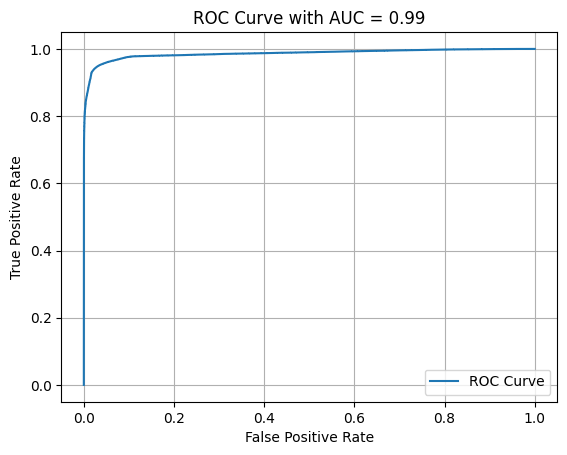

In [66]:
model3 = SVC(C=1000, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train7, y_train7)

ypred_train14 = model3.predict(x_train7)
y_pred_test14 = model3.predict(x_test7)

print("Training Results\n")
print(classification_report(y_train7, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test7, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train7, y_train7, cv=5)
# print("Cross-Validation Scores for the Best Model:", cross_val_scores)
# print("Average Cross-Validation Score:", cross_val_scores.mean())

y_proba_test = model3.predict_proba(x_test7)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test7, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test7, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()